# Support vector regression (SVR)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

In [2]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 100))

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)$.

Na ich podstawie będziemy wykonywać naszej presykcji.

# Wyznacz optymalne parametry

In [3]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [0.001, 0.01, 0.1, 1, 10 ,100, 1000],
                               "gamma": [0.001, 0.01, 0.1, 1, 10 ,100, 1000]})

In [4]:
svr.fit(x, y)
svr.best_params_

{'C': 1000, 'gamma': 1}

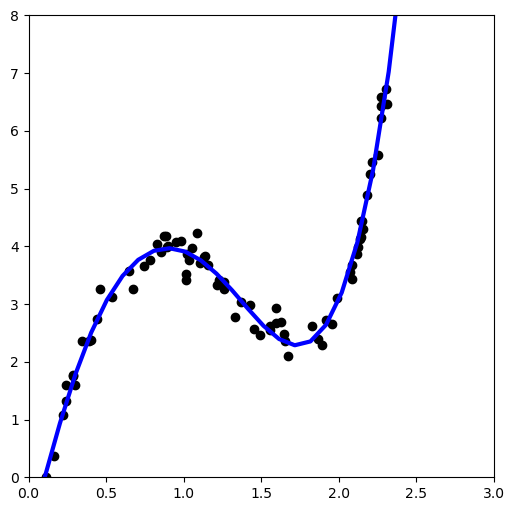

In [5]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, svr.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zad

Wyznacz optymalne parametry dla modelu SVR.

In [7]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'Radio','Newspaper']]
y = df_adv['Sales']
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [0.001, 0.01, 0.1, 1, 10 ,100, 1000],
                               "gamma": [0.001, 0.01, 0.1, 1, 10 ,100, 1000]})
svr.fit(X, y)
svr.best_params_

{'C': 100, 'gamma': 0.001}